**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.
**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Importing dataset**

web_traffic.tsv

dataset = pd.read_csv('./datasets/web_traffic.tsv')

In [2]:
dataset = pd.read_csv('./datasets/web_traffic.tsv', delimiter = '\t',header = None) # tab seperated valueweb_traffic.tsvrated values
dataset
dataset.columns = ['Hours', 'Hits']

In [3]:
dataset.head() # display first five rows

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [4]:
print(dataset.keys())
print(dataset.info())

Index(['Hours', 'Hits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB
None


In [5]:
# Removing missing values

In [6]:
dataset = dataset.dropna() # shift  + tab for syntax
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 742
Data columns (total 2 columns):
Hours    735 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [7]:
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


**Step-1: Converting Dataframes into array**

In [8]:
X = dataset['Hours'].values # independent variable
y = dataset['Hits'].values # dependent variable

**Step-2: if data is unstructued -> converting into structred**

In [9]:
X = np.reshape(X,(len(X),1)) # reshaping
y = np.reshape(y,(len(y),1)) # reshaping
print('Shape of X ', X.shape)
print('Shape of y ', y.shape)

Shape of X  (735, 1)
Shape of y  (735, 1)


In [10]:
dataset.corr()

,Hours,Hits
Hours,1.000000,0.645232
Hits,0.645232,1.000000


**Step-3: Visualize the data : Scatter**

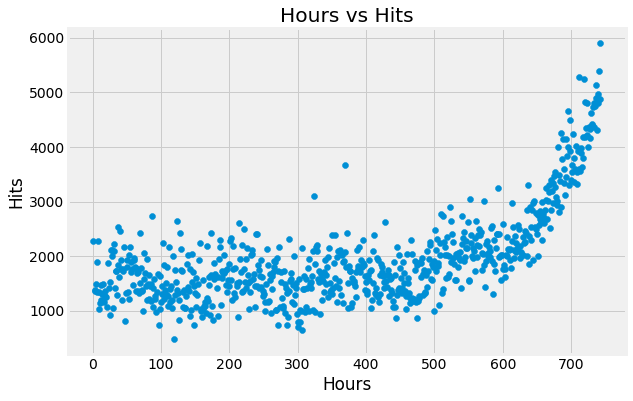

In [11]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.xlabel('Hours')
plt.ylabel('Hits')
plt.title('Hours vs Hits')
plt.show()

**splitting data into two parts training and test**

In [12]:
from sklearn.cross_validation import train_test_split
# training = 80 % tesing = 20 %

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                   random_state = 0)

In [14]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((588, 1), (147, 1), (588, 1), (147, 1))

# Building Simple linear regression using

**sklearn**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
predictor = LinearRegression()

In [17]:
predictor.fit(X_train,y_train) # training model(linear regression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred = predictor.predict(X_test) # input values - evaluating model
y_full = predictor.predict(X) # for plotting

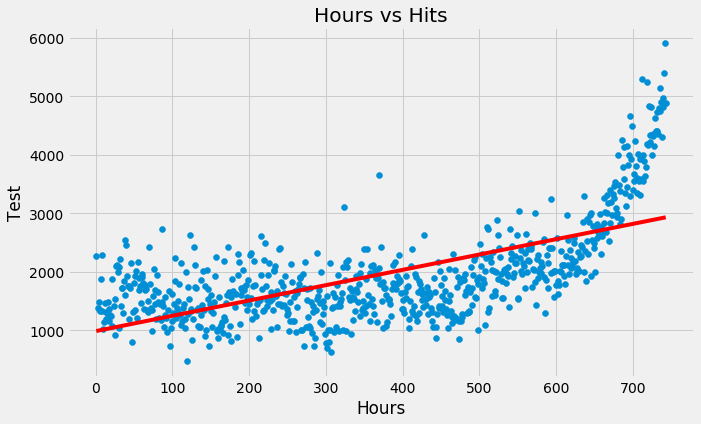

In [19]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.plot(X,y_full, 'r') # change this

plt.xlabel('Hours')
plt.ylabel('Test')
plt.title('Hours vs Hits')
plt.show()

# Model Evaluation 
- $R^2$  dollar sign
- Mean Absolute Error
- Mean Square Error

In [20]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [21]:
# y -> true value
# y_pred -> predicted values
rscore = r2_score(y_test, y_pred) 
print('R2 score :',rscore)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mean absolute error', mae)
print('mean squared error', mse)

R2 score : 0.42111780477482985
mean absolute error 449.05752984293383
mean squared error 373037.6998627876


# Application

In [22]:
b0 = predictor.intercept_
b1 = predictor.coef_
print('b0:', b0)
print('b1:', b1)

b0: [988.56785837]
b1: [[2.61731891]]


In [23]:
exp_hits = 100000
hours = (exp_hits - b0)/b1

In [24]:
week = hours / (24*7)
week

array([[225.17460901]])

# Polynomial Regression

In [26]:
X2 = X**2   # captial X

In [29]:
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [32]:
# adding polynomial features
X_poly = np.concatenate((X,X2),axis = 1)
X_poly

array([[     1,      1],
       [     3,      9],
       [     4,     16],
       ...,
       [   741, 549081],
       [   742, 550564],
       [   743, 552049]], dtype=int64)

In [33]:
poly_reg = LinearRegression() # Name of my polynomial regression

In [34]:
poly_reg.fit(X_poly,y) # trainig polynomial regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_poly_pred = poly_reg.predict(X_poly) 

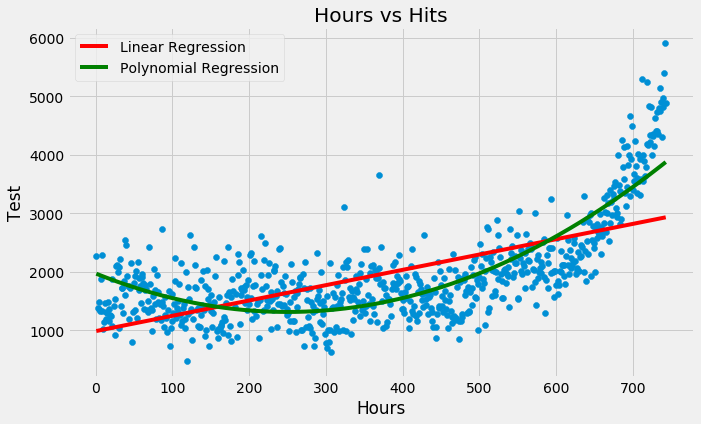

In [36]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.plot(X,y_full, 'r') # change this
plt.plot(X,y_poly_pred, 'g')

plt.xlabel('Hours')
plt.ylabel('Test')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression','Polynomial Regression'])
plt.show()

# polynomial degree 3

In [37]:
X3 = X**3   # captial X

In [38]:
# adding polynomial features
X_poly3 = np.concatenate((X,X2,X3),axis = 1)
X_poly3

array([[        1,         1,         1],
       [        3,         9,        27],
       [        4,        16,        64],
       ...,
       [      741,    549081, 406869021],
       [      742,    550564, 408518488],
       [      743,    552049, 410172407]], dtype=int64)

In [39]:
poly_reg = LinearRegression() # Name of my polynomial regression

In [40]:
poly_reg.fit(X_poly3,y) # trainig polynomial regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_poly_pred = poly_reg.predict(X_poly3) 

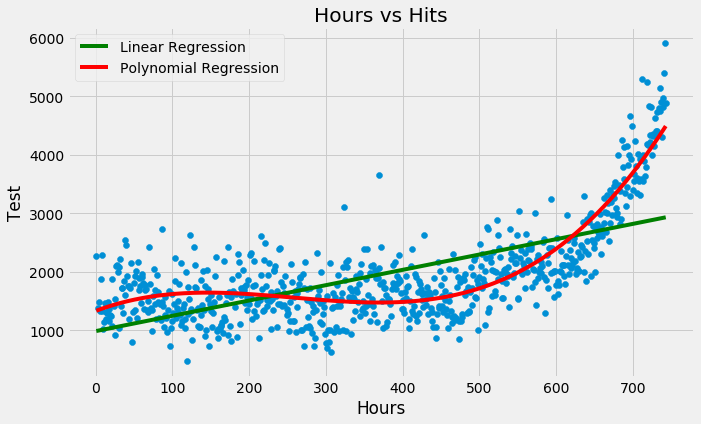

In [43]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.scatter(X,y)
plt.plot(X,y_full, 'g') # change this
plt.plot(X,y_poly_pred, 'r')

plt.xlabel('Hours')
plt.ylabel('Test')
plt.title('Hours vs Hits')
plt.legend(['Linear Regression','Polynomial Regression'])
plt.show()